In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from scipy.io import loadmat, savemat
import sys

def calculate_mse(y_true, y_pred):
    y_true = y_true.reshape(-1, y_true.shape[1]*y_true.shape[2])
    y_pred = y_pred.reshape(-1, y_pred.shape[1]*y_pred.shape[2])
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2, axis = -1)

def calculate_l2_error(y_true, y_pred):
    relative_errors = np.linalg.norm(y_true - y_pred, axis=0) / (np.linalg.norm(y_true, axis=0) + np.finfo(float).eps)
    return np.mean(relative_errors)

def calculate_max_abs(y_true, y_pred):
    y_true = y_true.reshape(y_true.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    abs_errors = np.abs(y_true - y_pred)
    n_samples = y_true.shape[0]
    max_abs_errors = np.max(abs_errors, axis=0)
    # Error Variance (average variance across samples)
    variances = [np.var(abs_errors[i]) for i in range(n_samples)]
    avg_variance = np.mean(variances)
    return max_abs_errors, avg_variance

# Time settings with units (seconds)
t = np.linspace(0.02, 600, 30000).reshape(-1,1)  # seconds
cutoff = 100
rtime = 30
t_inp = t[0:-cutoff,:]
t_inp = t_inp[::rtime,:]
t_out = t[cutoff::,:]
t_out = t_out[::rtime,:]

# Initialize errors array for storing metrics
errors = np.zeros((6, 4))
# Column 1: MSE overall (units based on response type)
# Column 2: MSE best sample
# Column 3: MSE worst sample
# Column 4: Relative L2

# Row 1: FNO - Ux(m)
# Row 2: SA-FNO - Ux(m)
data = loadmat('fno/ux_allfloors/Results/WindResponse_test')
inputs = data['x_test']
targets_ux = data['y1_test']  # displacement in meters
pred_ux_fno = data['y1_pred']  # displacement in meters
mse_ux_fno_samp = calculate_mse(targets_ux, pred_ux_fno)
mse_ux_fno = np.mean(mse_ux_fno_samp)
l2_ux_fno = calculate_l2_error(targets_ux, pred_ux_fno)
a,b = calculate_max_abs(targets_ux, pred_ux_fno)
print("Max absolute error:", np.max(a))
print("Mean Max absolute error:", np.mean(a))
print("Average variance of absolute error:", b)
# sys.exit()
# errors[0,0] = mse_ux_fno
# errors[0,1] = np.min(mse_ux_fno_samp)
# min_index = np.argmin(mse_ux_fno_samp)
# print("Index of minimum Ux(m) FNO:", min_index)
# errors[0,2] = np.max(mse_ux_fno_samp)
# errors[0,3] = l2_ux_fno

data = loadmat('sa-fno/ux_allfloors/Results/WindResponse_test')
pred_ux_sa_fno = data['y1_pred']  # displacement in meters
mse_ux_sa_fno_samp = calculate_mse(targets_ux, pred_ux_sa_fno)
mse_ux_sa_fno = np.mean(mse_ux_sa_fno_samp)
l2_ux_sa_fno = calculate_l2_error(targets_ux, pred_ux_sa_fno)
a,b = calculate_max_abs(targets_ux, pred_ux_sa_fno)
print("Max absolute error:", np.max(a))
print("Mean Max absolute error:", np.mean(a))
print("Average variance of absolute error:", b)
sys.exit()
errors[1,0] = mse_ux_sa_fno
errors[1,1] = np.min(mse_ux_sa_fno_samp)
min_index = np.argmin(mse_ux_sa_fno_samp)
print("Index of minimum Ux(m) SA-FNO:", min_index)
errors[1,2] = np.max(mse_ux_sa_fno_samp)
errors[1,3] = l2_ux_sa_fno

# Uz measurements (meters)
data = loadmat('fno/uz_allfloors/Results/WindResponse_test')
targets_uz = data['y1_test']  # displacement in meters
pred_uz_fno = data['y1_pred']  # displacement in meters
mse_uz_fno_samp = calculate_mse(targets_uz, pred_uz_fno)
mse_uz_fno = np.mean(mse_uz_fno_samp)
l2_uz_fno = calculate_l2_error(targets_uz, pred_uz_fno)
errors[4,0] = mse_uz_fno
errors[4,1] = np.min(mse_uz_fno_samp)
min_index = np.argmin(mse_uz_fno_samp)
print("Index of minimum Uz(m) FNO:", min_index)
errors[4,2] = np.max(mse_uz_fno_samp)
errors[4,3] = l2_uz_fno

data = loadmat('sa-fno/uz_allfloors/Results/WindResponse_test')
pred_uz_sa_fno = data['y1_pred']  # displacement in meters
mse_uz_sa_fno_samp = calculate_mse(targets_uz, pred_uz_sa_fno)
mse_uz_sa_fno = np.mean(mse_uz_sa_fno_samp)
l2_uz_sa_fno = calculate_l2_error(targets_uz, pred_uz_sa_fno)
errors[5,0] = mse_uz_sa_fno
errors[5,1] = np.min(mse_uz_sa_fno_samp)
min_index = np.argmin(mse_uz_sa_fno_samp)
print("Index of minimum Uz(m) SA-FNO:", min_index)
errors[5,2] = np.max(mse_uz_sa_fno_samp)
errors[5,3] = l2_uz_sa_fno

# Ry measurements (radians)
data = loadmat('fno/uy_allfloors/Results/WindResponse_test')
targets_uy = data['y1_test']  # rotation in radians
pred_uy_fno = data['y1_pred']  # rotation in radians
mse_uy_fno_samp = calculate_mse(targets_uy, pred_uy_fno)
mse_uy_fno = np.mean(mse_uy_fno_samp)
l2_uy_fno = calculate_l2_error(targets_uy, pred_uy_fno)
errors[2,0] = mse_uy_fno
errors[2,1] = np.min(mse_uy_fno_samp)
min_index = np.argmin(mse_uy_fno_samp)
print("Index of minimum Ry(rad) FNO:", min_index)
errors[2,2] = np.max(mse_uy_fno_samp)
errors[2,3] = l2_uy_fno

data = loadmat('sa-fno/uy_allfloors/Results/WindResponse_test')
pred_uy_sa_fno = data['y1_pred']  # rotation in radians
mse_uy_sa_fno_samp = calculate_mse(targets_uy, pred_uy_sa_fno)
mse_uy_sa_fno = np.mean(mse_uy_sa_fno_samp)
l2_uy_sa_fno = calculate_l2_error(targets_uy, pred_uy_sa_fno)
errors[3,0] = mse_uy_sa_fno
errors[3,1] = np.min(mse_uy_sa_fno_samp)
min_index = np.argmin(mse_uy_sa_fno_samp)
print("Index of minimum Ry(rad) SA-FNO:", min_index)
errors[3,2] = np.max(mse_uy_sa_fno_samp)
errors[3,3] = l2_uy_sa_fno

print(errors)

Max absolute error: 6.1009417
Mean Max absolute error: 2.0391474
Average variance of absolute error: 0.070974134
Max absolute error: 6.8704886
Mean Max absolute error: 2.2556508
Average variance of absolute error: 0.09462807


SystemExit: 

/var/folders/vc/gqd4ss1s2zg3hrh9742jyrcw0000gn/T/ipykernel_12042/2218632912.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


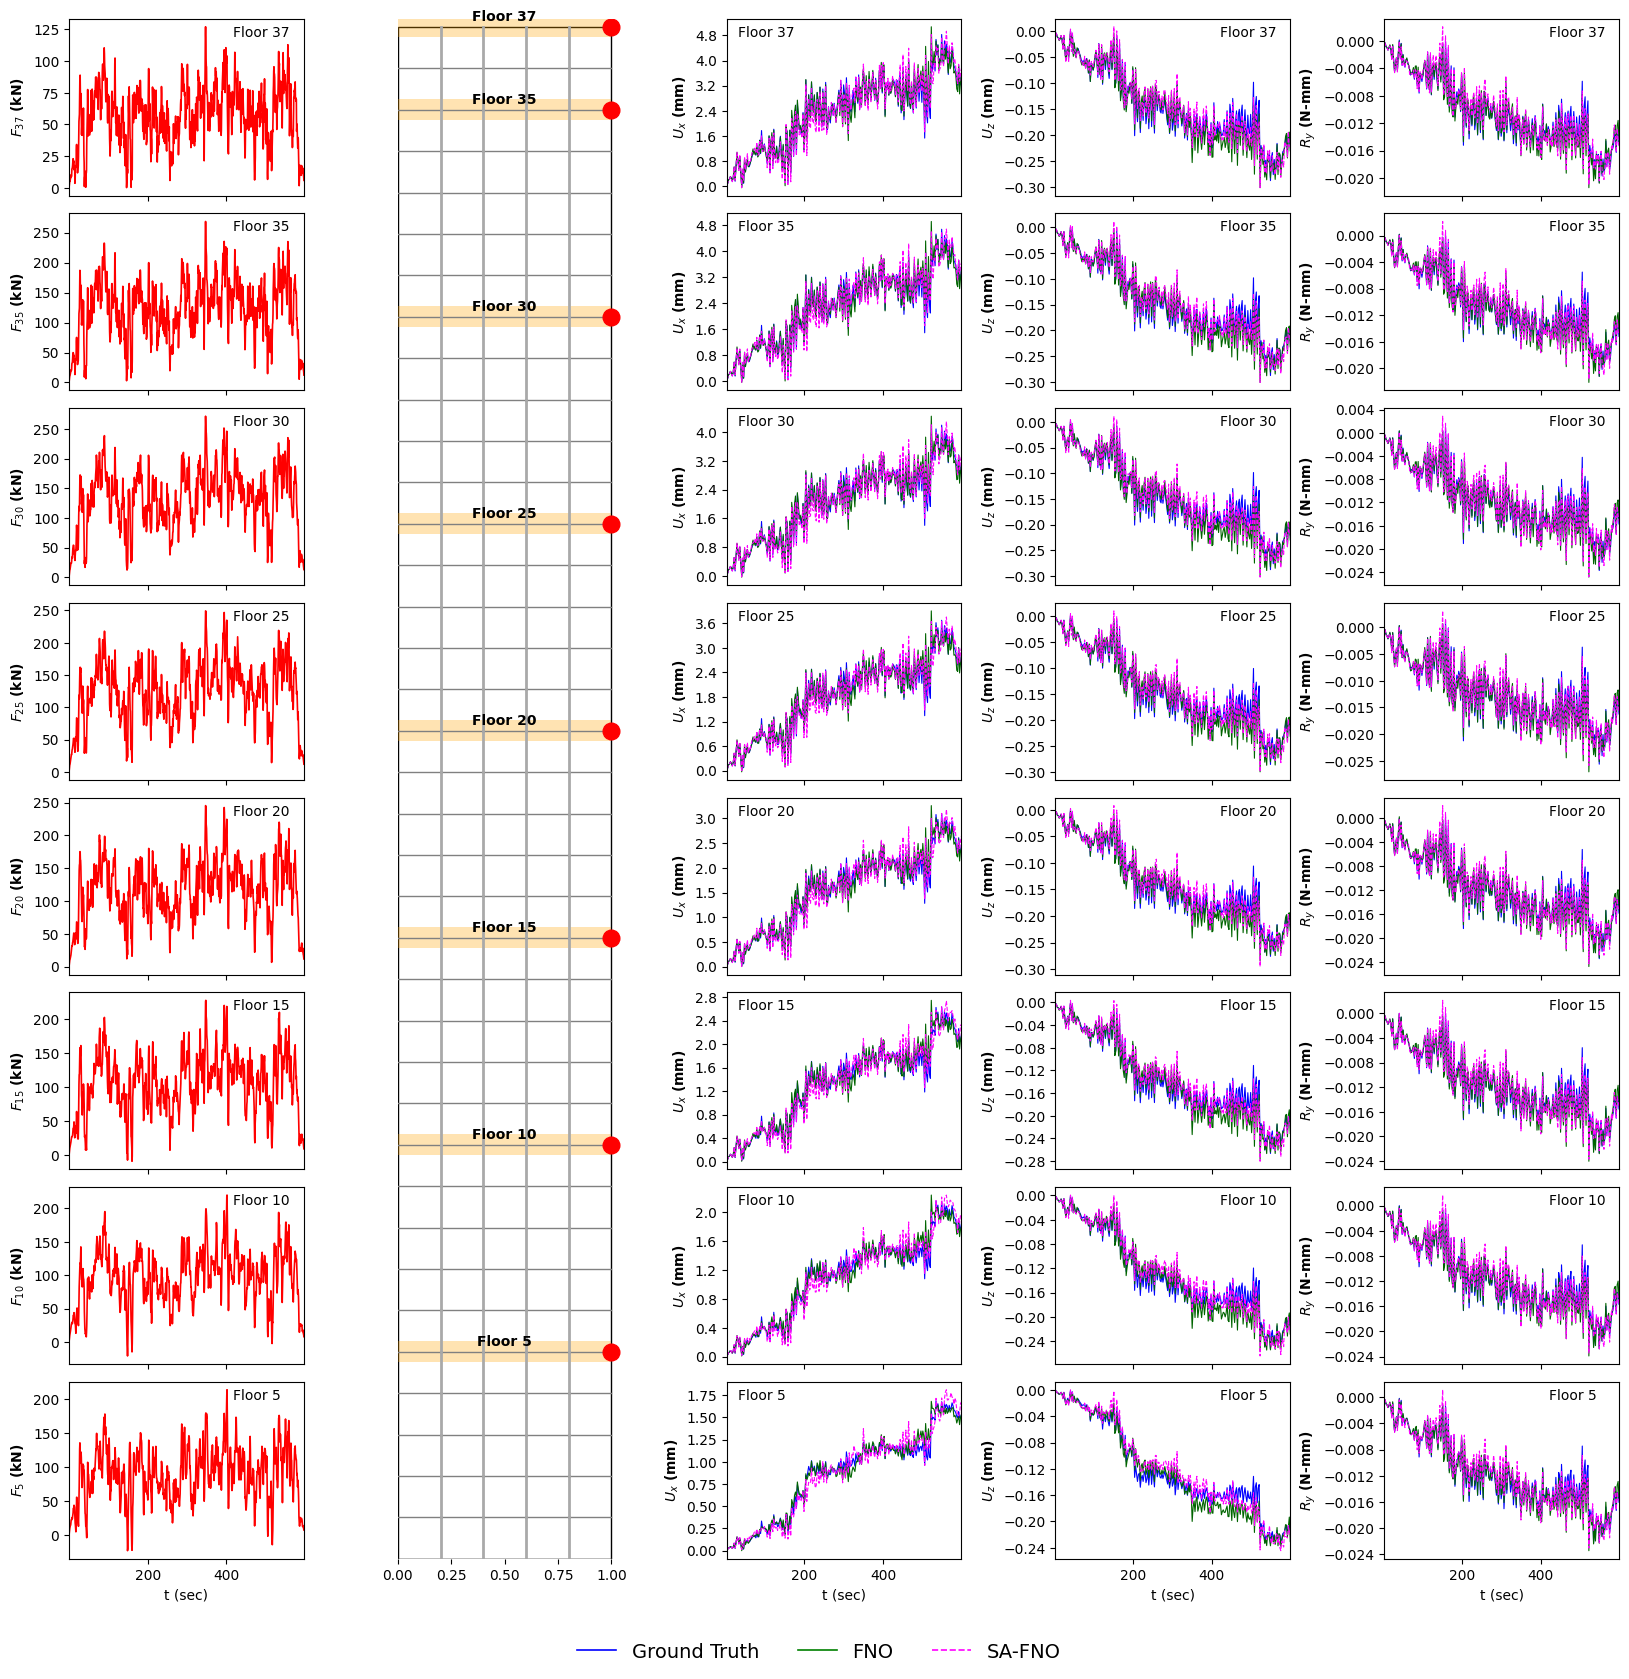

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def create_plot(
    time_inp, time_out, selected_floors, wind_inputs, 
    ux_fno, uy_fno, uz_fno, ux_safno, uy_safno, uz_safno, 
    ux_tar, uy_tar, uz_tar
):
    fig = plt.figure(figsize=(20, 20))
    num_floors = selected_floors.shape[0]
    gs = gridspec.GridSpec(num_floors, 5, hspace=0.1, wspace=0.4)

    # Wind Input Subplot
    for i in range(num_floors):
        ax_input = fig.add_subplot(gs[num_floors - 1 - i, 0])
        ax_input.plot(time_inp, wind_inputs[i, :], color='red', linewidth=1.2)
        ax_input.set_ylabel(rf'$F_{{{selected_floors[i]}}}$ (kN)', fontweight='bold')
        ax_input.text(0.70, 0.90, f'Floor {selected_floors[i]}', transform=ax_input.transAxes)
        ax_input.set_xlim([time_inp[0], time_inp[-1]])
        if i != 0:
            ax_input.set_xticklabels([])
        else:
            ax_input.set_xlabel('t (sec)')
        
    # Building Structure
    ax_building = fig.add_subplot(gs[:, 1])
    ax_building.set_xlim(0, 1.1)
    ax_building.set_ylim(0, 37.2)
    ax_building.set_yticklabels([])
    ax_building.set_yticks([])
    ax_building.spines['top'].set_visible(False)
    ax_building.spines['right'].set_visible(False)
    ax_building.spines['bottom'].set_visible(False)
    ax_building.spines['left'].set_visible(False)
    ax_building.add_patch(
        plt.Rectangle((0, 0), 1, 37, facecolor='white', edgecolor='black', linewidth=1)
    )

    for floor in range(37):
        ax_building.plot([0, 1], [floor, floor], color='gray', linewidth=1)
        for x_pos in [0.2, 0.4, 0.6, 0.8]:
            ax_building.plot([x_pos, x_pos], [floor, floor + 1], color='darkgray', linewidth=2)

    # Highlighting selected floors
    band_height = 0.5
    for floor in selected_floors:
        ax_building.add_patch(
            plt.Rectangle((0, floor - band_height/2), 1, band_height, 
                          facecolor='orange', alpha=0.3, edgecolor='none')
        )
        ax_building.text(
            0.5, floor + 0.08, f'Floor {floor}', ha='center', va='bottom', fontsize=10, fontweight='bold'
        )

        # Add marker at the right-most node
        ax_building.plot(1, floor, marker='o', markersize=12, markerfacecolor='red', markeredgecolor='red')

    # Response plots (Ux, Ry, Uz)
    for col, (tar, fno, safno) in enumerate(zip(
        [ux_tar, uy_tar, uz_tar], 
        [ux_fno, uy_fno, uz_fno], 
        [ux_safno, uy_safno, uz_safno])):
        for i in range(num_floors):
            r = 4
            ax_response = fig.add_subplot(gs[num_floors - 1 - i, 2 + col])
            ax_response.plot(time_out[::r,0], tar[i, ::r], label='Ground Truth', color='blue', linewidth=0.8)
            ax_response.plot(time_out[::r,0], fno[i, ::r], label='FNO', color='darkgreen', linewidth=0.8, linestyle='solid')
            ax_response.plot(time_out[::r,0], safno[i, ::r], label='SA-FNO', color='magenta', linewidth=0.8, linestyle='dashed')
            ax_response.set_xlim([time_out[0], time_out[-1]])
            ax_response.yaxis.set_major_locator(plt.MaxNLocator(nbins=8, prune='both'))

            if i != 0:
                ax_response.set_xticklabels([])
            else:
                ax_response.set_xlabel('t (sec)')
                
            if col == 0:
                ax_response.text(0.05, 0.90, f'Floor {selected_floors[i]}', transform=ax_response.transAxes)    
                ax_response.set_ylabel(rf'$U_x$ (mm)', fontweight='bold')     

            if col == 1:
                ax_response.text(0.70, 0.90, f'Floor {selected_floors[i]}', transform=ax_response.transAxes) 
                ax_response.set_ylabel(rf'$U_z$ (mm)', fontweight='bold')        

            if col == 2:    
                ax_response.text(0.70, 0.90, f'Floor {selected_floors[i]}', transform=ax_response.transAxes)
                ax_response.set_ylabel(rf'$R_y$ (N-mm)', fontweight='bold')  

    # Common Legend
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=1.2, label='Ground Truth'),
        plt.Line2D([0], [0], color='green', linewidth=1.2, label='FNO', linestyle='solid'),
        plt.Line2D([0], [0], color='magenta', linewidth=1.2, label='SA-FNO', linestyle='dashed')
    ]
    fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=14, bbox_to_anchor=(0.5, 0.05), frameon=False)

    plt.tight_layout()
    return fig

selected_floors = np.array([5, 10, 15, 20, 25, 30, 35, 37])
samp_num = 13

wind_inp = inputs[samp_num,:,selected_floors-1]
ux_tar = targets_ux[samp_num,:,selected_floors-1]
ux_fno = pred_ux_fno[samp_num,:,selected_floors-1]
ux_safno = pred_ux_sa_fno[samp_num,:,selected_floors-1]
uy_tar = targets_uy[samp_num,:,selected_floors-1]
uy_fno = pred_uy_fno[samp_num,:,selected_floors-1]
uy_safno = pred_uy_sa_fno[samp_num,:,selected_floors-1]
uz_tar = targets_uz[samp_num,:,selected_floors-1]
uz_fno = pred_uz_fno[samp_num,:,selected_floors-1]
uz_safno = pred_uz_sa_fno[samp_num,:,selected_floors-1]

fig = create_plot(t_inp, t_out, selected_floors, wind_inp, ux_fno, uy_fno, uz_fno, ux_safno, uy_safno, uz_safno, ux_tar, uy_tar, uz_tar)

plt.savefig('wind_response_fno_sa-fno_wholeBuilding.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/vc/gqd4ss1s2zg3hrh9742jyrcw0000gn/T/ipykernel_12042/3817837816.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust to leave space for the legend


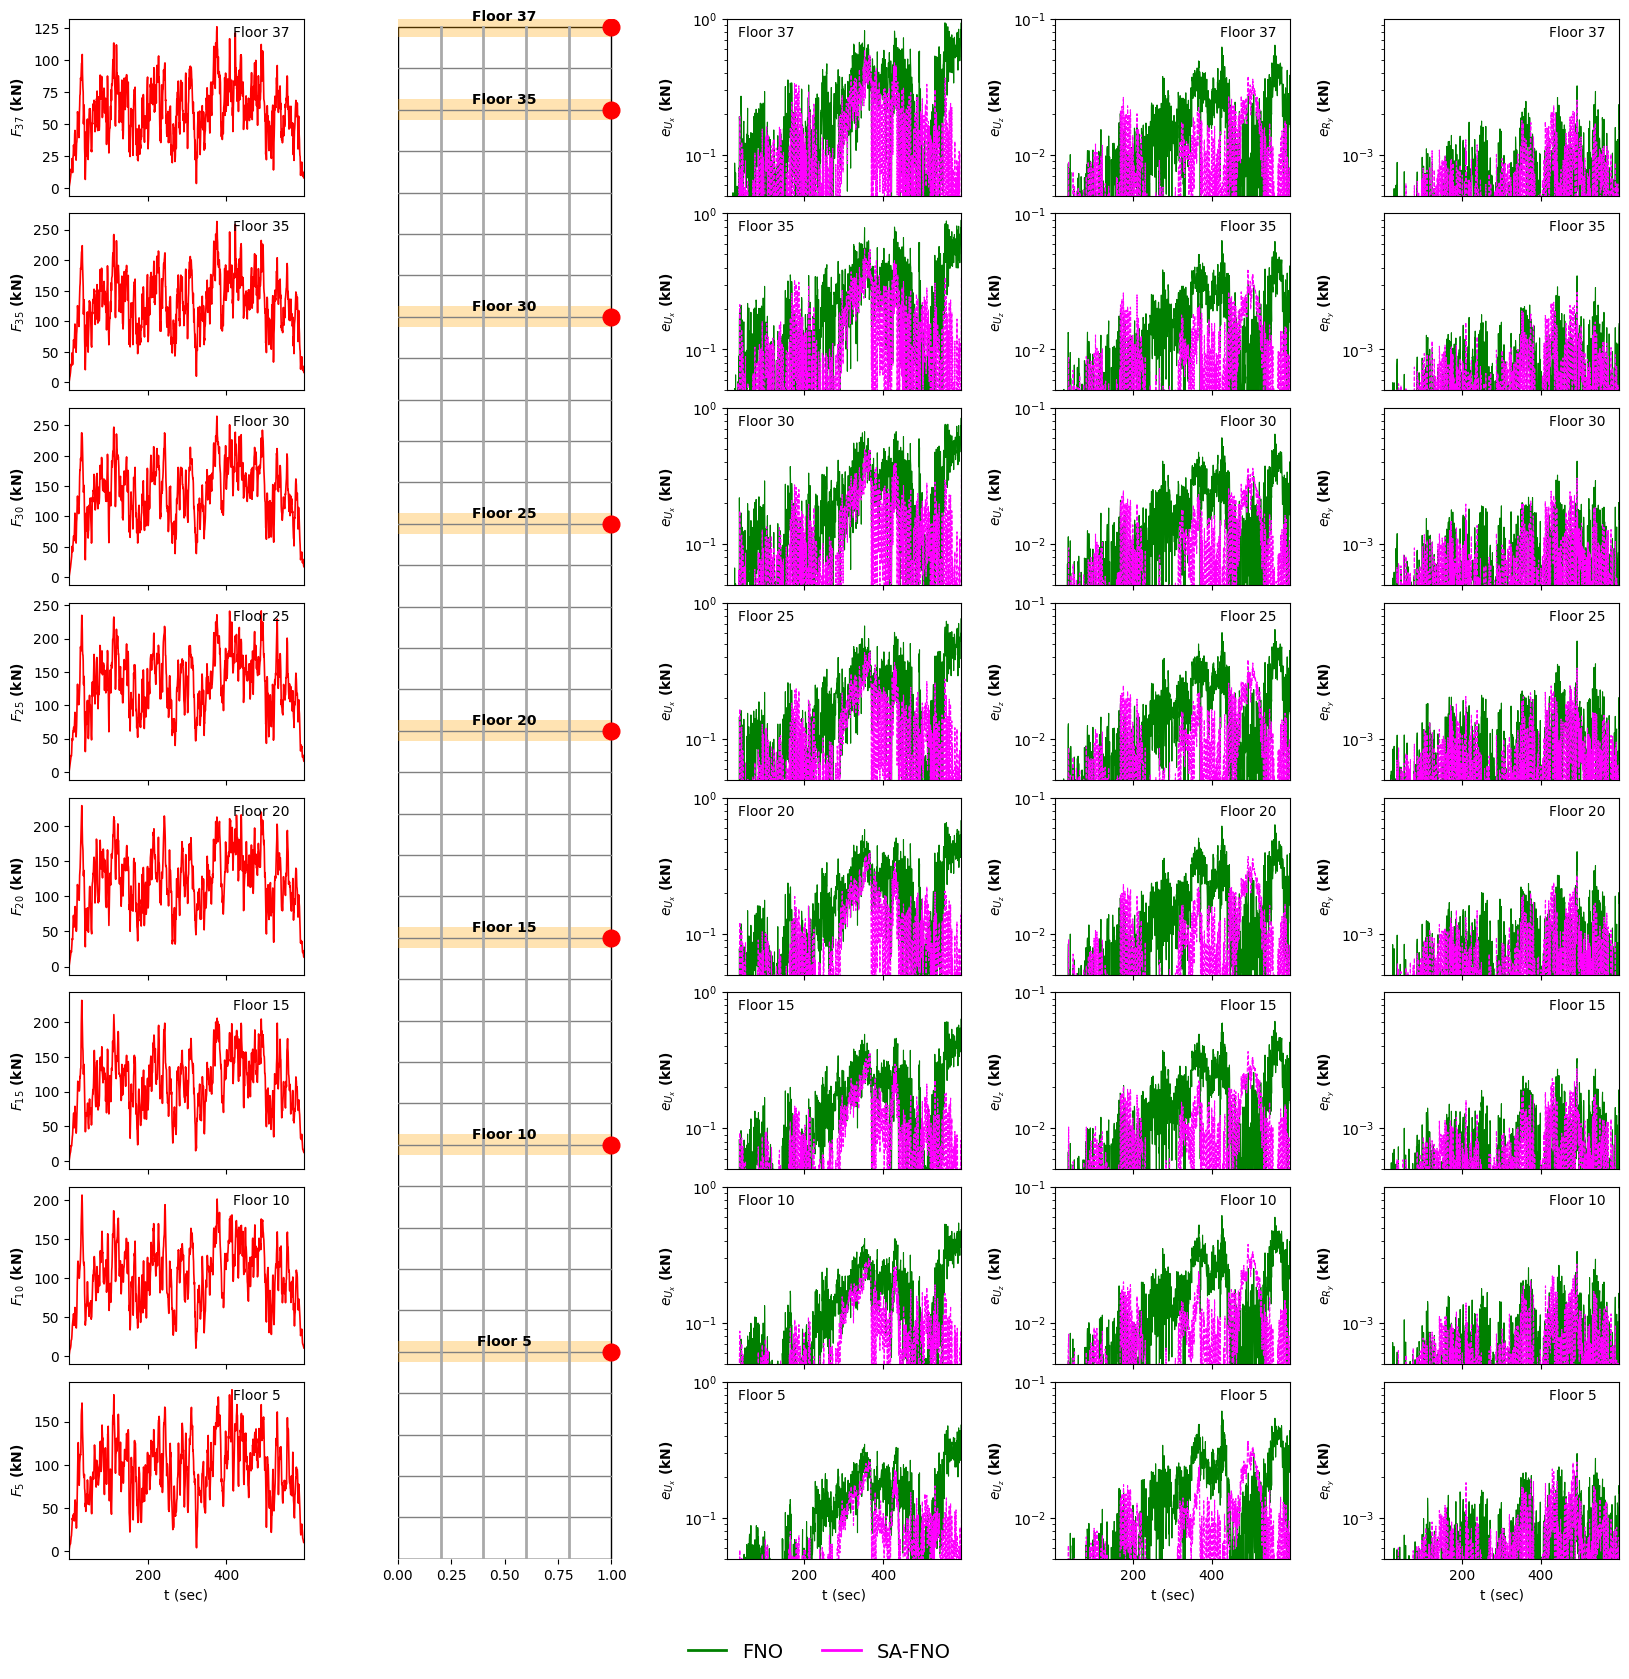

In [47]:
# For plotting the Error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def create_plot(
    time_inp, time_out, selected_floors, wind_inputs, 
    ux_fno, uy_fno, uz_fno, ux_safno, uy_safno, uz_safno, 
    ux_tar, uy_tar, uz_tar
):
    fig = plt.figure(figsize=(20, 20))
    num_floors = selected_floors.shape[0]
    gs = gridspec.GridSpec(num_floors, 5, hspace=0.1, wspace=0.4)

    # Wind Input Subplot
    for i in range(num_floors):
        ax_input = fig.add_subplot(gs[num_floors - 1 - i, 0])
        ax_input.plot(time_inp, wind_inputs[i, :], color='red', linewidth=1.2)
        ax_input.set_ylabel(rf'$F_{{{selected_floors[i]}}}$ (kN)', fontweight='bold')
        ax_input.text(0.70, 0.90, f'Floor {selected_floors[i]}', transform=ax_input.transAxes)
        ax_input.set_xlim([time_inp[0], time_inp[-1]])
        if i != 0:
            ax_input.set_xticklabels([])
        else:
            ax_input.set_xlabel('t (sec)')
        
    # Building Structure
    ax_building = fig.add_subplot(gs[:, 1])
    ax_building.set_xlim(0, 1.1)
    ax_building.set_ylim(0, 37.2)
    ax_building.set_yticklabels([])
    ax_building.set_yticks([])
    ax_building.spines['top'].set_visible(False)
    ax_building.spines['right'].set_visible(False)
    ax_building.spines['bottom'].set_visible(False)
    ax_building.spines['left'].set_visible(False)
    ax_building.add_patch(
        plt.Rectangle((0, 0), 1, 37, facecolor='white', edgecolor='black', linewidth=1)
    )

    for floor in range(37):
        ax_building.plot([0, 1], [floor, floor], color='gray', linewidth=1)
        for x_pos in [0.2, 0.4, 0.6, 0.8]:
            ax_building.plot([x_pos, x_pos], [floor, floor + 1], color='darkgray', linewidth=2)

    # Highlighting selected floors
    band_height = 0.5
    for floor in selected_floors:
        ax_building.add_patch(
            plt.Rectangle((0, floor - band_height/2), 1, band_height, 
                          facecolor='orange', alpha=0.3, edgecolor='none')
        )
        ax_building.text(
            0.5, floor + 0.08, f'Floor {floor}', ha='center', va='bottom', fontsize=10, fontweight='bold'
        )

        # Add marker at the right-most node
        ax_building.plot(1, floor, marker='o', markersize=12, markerfacecolor='red', markeredgecolor='red')
        
    # UX, UY, UZ Columns
    for col, (tar, fno, safno) in enumerate(zip(
        [ux_tar, uy_tar, uz_tar], 
        [ux_fno, uy_fno, uz_fno], 
        [ux_safno, uy_safno, uz_safno]
    )):
        for i in range(num_floors):
            ax_response = fig.add_subplot(gs[num_floors - 1 - i, 2 + col])
            
            # Calculate the errors
            error_fno = np.abs(tar[i, :] - fno[i, :])
            error_safno = np.abs(tar[i, :] - safno[i, :])
            
            # Plot the errors
            ax_response.plot(time_out, error_fno, label='FNO', color='green', linewidth=0.8, linestyle='solid')
            ax_response.plot(time_out, error_safno, label='SA-FNO', color='magenta', linewidth=0.8, linestyle='dashed')
            ax_response.set_xlim([time_out[0], time_out[-1]])
            ax_response.set_yscale('log')
            
            # Set dynamic y-axis range
            max_error = max(np.max(error_fno), np.max(error_safno))
            upper_limit = 10 ** np.ceil(np.log10(max_error))  # Ceiling to the next power of 10
            lower_limit = 5*upper_limit * 10**-2  # Two orders of magnitude smaller
            ax_response.set_ylim([lower_limit, upper_limit])
            
            if i != 0:
                ax_response.set_xticklabels([])
            else:
                ax_response.set_xlabel('t (sec)')
                
            if col == 0:
                ax_response.text(0.05, 0.90, f'Floor {selected_floors[i]}', transform=ax_response.transAxes)    
                ax_response.set_ylabel(rf'$e_{{U_x}}$ (kN)', fontweight='bold')     

            if col == 1:
                ax_response.text(0.70, 0.90, f'Floor {selected_floors[i]}', transform=ax_response.transAxes) 
                ax_response.set_ylabel(rf'$e_{{U_z}}$ (kN)', fontweight='bold')        

            if col == 2:    
                ax_response.text(0.70, 0.90, f'Floor {selected_floors[i]}', transform=ax_response.transAxes)
                ax_response.set_ylabel(rf'$e_{{R_y}}$ (kN)', fontweight='bold')     
    # Common Legend
    handles = [
        #plt.Line2D([0], [0], color='blue', linewidth=2, label='Ground Truth'),
        plt.Line2D([0], [0], color='green', linewidth=2, label='FNO'),
        plt.Line2D([0], [0], color='magenta', linewidth=2, label='SA-FNO')
    ]
    fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=14, bbox_to_anchor=(0.5, 0.05), frameon=False)

    plt.tight_layout()  # Adjust to leave space for the legend
    return fig

selected_floors = np.array([5, 10, 15, 20, 25, 30, 35, 37]) # Selected floors
samp_num = 80
wind_inp = inputs[samp_num,:,selected_floors-1]
ux_tar = targets_ux[samp_num,:,selected_floors-1]
ux_fno = pred_ux_fno[samp_num,:,selected_floors-1]
ux_safno = pred_ux_sa_fno[samp_num,:,selected_floors-1]
uy_tar = targets_uy[samp_num,:,selected_floors-1]
uy_fno = pred_uy_fno[samp_num,:,selected_floors-1]
uy_safno = pred_uy_sa_fno[samp_num,:,selected_floors-1]
uz_tar = targets_uz[samp_num,:,selected_floors-1]
uz_fno = pred_uz_fno[samp_num,:,selected_floors-1]
uz_safno = pred_uz_sa_fno[samp_num,:,selected_floors-1]

fig = create_plot(t_inp, t_out, selected_floors, wind_inp, ux_safno, uy_safno, uz_safno, ux_fno, uy_fno, uz_fno, ux_tar, uy_tar, uz_tar)

# Save the figure
plt.savefig('wind_response_fno_sa-fno_wholeBuilding_error.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()